In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [63]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,MS Access,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,Etcd,MySQL
0,Activiti,automation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,airbyte,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [109]:
df.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                            89
H2                               64
PostgreSQL                       62
Redis                            54
Oracle                           50
Ehcache                          41
MariaDB                          35
MongoDB                          31
MS SQL Server                    30
SQLite                           26
Elasticsearch                    22
IBM DB2                          20
Hazelcast                        14
Google Cloud Datastore           14
HBase                            13
Cassandra                        13
DynamoDB                         13
Solr                             12
SAP Adaptive Server              12
Firebase Realtime                11
Hive                             11
Firebird                          9
Informix                          9
Google BigQuery                   8
ClickHouse                        7
Amazon Redshift                   6
Snowflake                         6
PostGIS                     

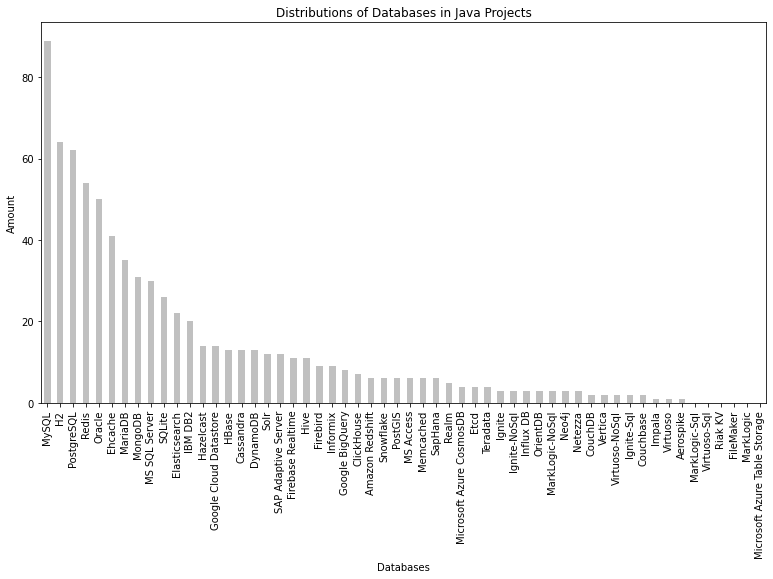

In [174]:
plt.figure(figsize=(13,7))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', 
                                                        color='silver',
                                                        title="Distributions of Databases in Java Projects")
plt.xlabel("Databases")
plt.ylabel("Amount")
plt.show() 

In [175]:
df.Domains.value_counts()

software development         75
media                        44
infrastructure management    40
network                      18
security                     18
monitoring                   18
game                         18
communication                16
hpc                          15
program analysis             15
machine learning             12
automation                    9
application container         7
file management               7
operating system              3
collaboration                 3
scm                           2
cryptocurrency                2
gestão pessoal                2
erp                           2
e-commerce                    1
cms                           1
Name: Domains, dtype: int64

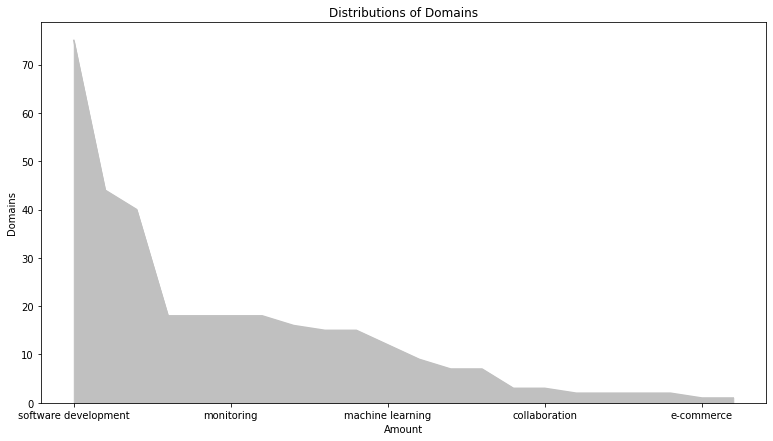

In [176]:
plt.figure(figsize=(13,7))
df.Domains.value_counts().plot(kind='area', color='silver',title = 'Distributions of Domains')
#plt.xlim(0,100)
plt.xlabel("Amount")
plt.ylabel("Domains")
plt.show() 

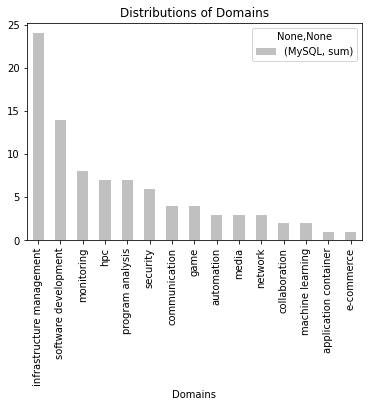

In [25]:
filtered_df = df.groupby('Domains').agg({'MySQL':['sum']})
filtered_df = filtered_df[filtered_df['MySQL']['sum'] > 0]
result = filtered_df.sort_values(by=('MySQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

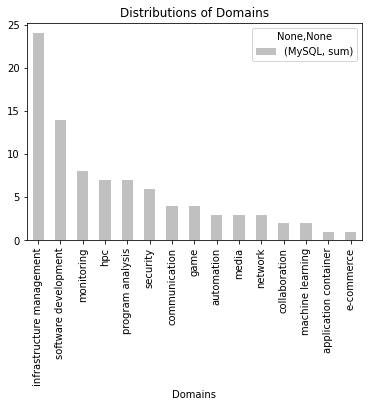

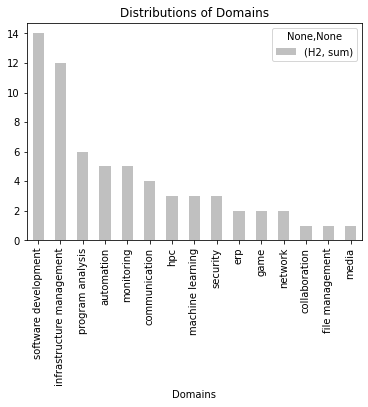

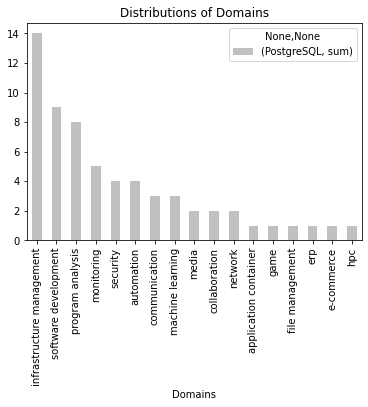

In [27]:
filtered_df = df.groupby('Domains').agg({'MySQL':['sum']})
filtered_df = filtered_df[filtered_df['MySQL']['sum'] > 0]
result = filtered_df.sort_values(by=('MySQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

filtered_df = df.groupby('Domains').agg({'H2':['sum']})
filtered_df = filtered_df[filtered_df['H2']['sum'] > 0]
result = filtered_df.sort_values(by=('H2','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

filtered_df = df.groupby('Domains').agg({'PostgreSQL':['sum']})
filtered_df = filtered_df[filtered_df['PostgreSQL']['sum'] > 0]
result = filtered_df.sort_values(by=('PostgreSQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

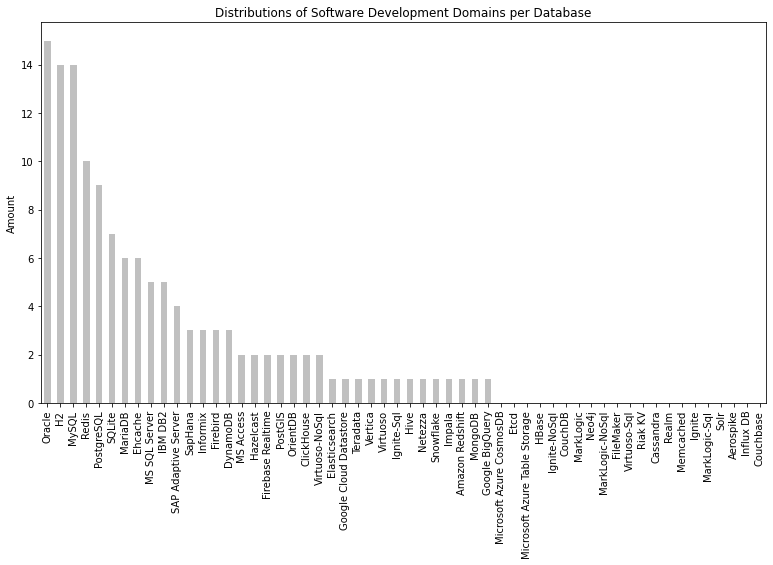

Text(0, 0.5, 'Amount')

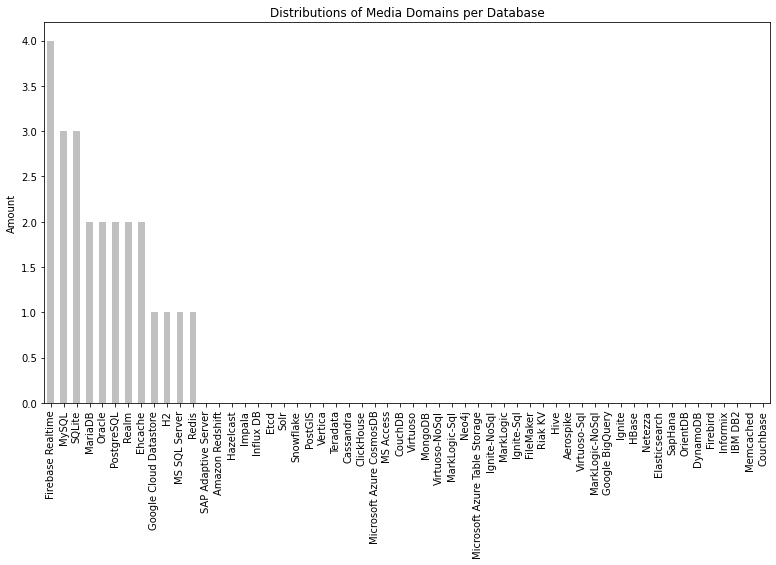

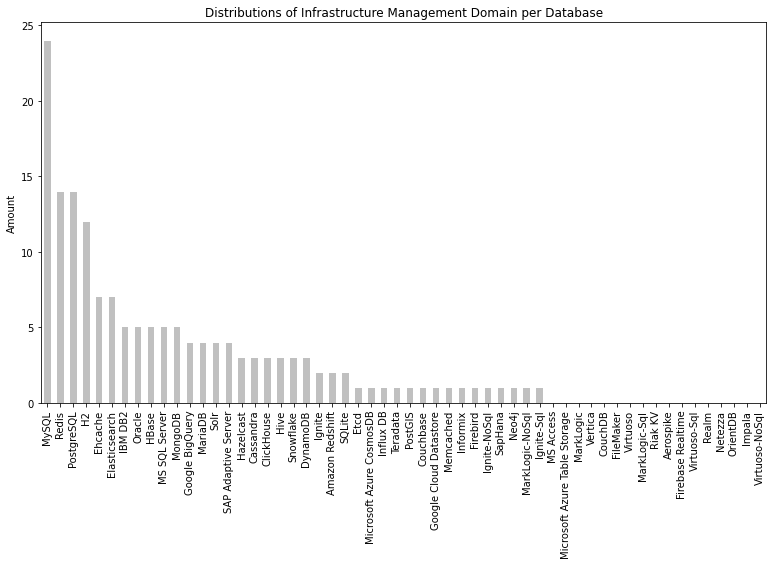

In [34]:
plt.figure(figsize=(13,7))
df_software_development = df[df.Domains =='software development'].sum()
df_software_development = df_software_development.iloc[2:].sort_values(ascending=False)
df_software_development.plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Software Development Domains per Database")
plt.ylabel("Amount")
plt.show() 

plt.figure(figsize=(13,7))
df_software_development = df[df.Domains =='media'].sum()
#print(df_software_development.iloc[2:].sort_values(ascending=False))
df_software_development.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver', title = 'Distributions of Domains')
plt.title("Distributions of Media Domains per Database")
plt.ylabel("Amount")
#plt.show() 

plt.figure(figsize=(13,7))
df_software_development = df[df.Domains =='infrastructure management'].sum()
df_software_development.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Infrastructure Management Domain per Database")
plt.ylabel("Amount")
#plt.show()

In [64]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df.head()

<ipython-input-64-a1a100043480>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[:,'SumPerProject'] = df.sum(axis=1)


,Projects,Domains,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,Etcd,MySQL,SumPerProject
0,Activiti,automation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,airbyte,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,10
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


<AxesSubplot:title={'center':'Amount of differents databases per projects'}>

<Figure size 7200x1440 with 0 Axes>

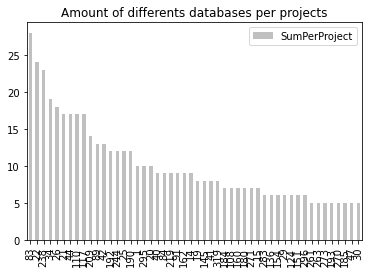

In [74]:
plt.figure(figsize=(100,20))
new_df = df.loc[:, ['Projects', 'SumPerProject']]
new_df = new_df.sort_values(by='SumPerProject', ascending=False)
new_df.iloc[:50, :].plot(kind='bar', color='silver', title = 'Amount of differents databases per projects')